In [1]:
"""
tournaments.ipynb

Jupyter Notebook to perform analysis on card market data.

Author: Casey Forey
Date Created: 4/7/24
"""

'\ntournaments.ipynb\n\nJupyter Notebook to perform analysis on card market data.\n\nAuthor: Casey Forey\nDate Created: 4/7/24\n'

In [2]:
# Imports
import json 
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import src.load.load_tournament_data as ltd
import src.plot.plot_tournament_data as ptd

In [3]:
# Constants
DATA_DIRECTORY: str = 'data/'

In [4]:
path = 'data/AtomicCards.json' 
f = open(path, encoding= "utf8") 
atm_cards = json.load(f)

path = 'data/AllPrintings.json' 
f = open(path, encoding= "utf8") 
all_cards = json.load(f)

path = 'data/AllPricesToday.json' 
f = open(path) 
prices = json.load(f)

path = 'data/SetList.json' 
f = open(path, encoding= "utf8") 
set_list = json.load(f)

## Modern Data

In [5]:
base_path: str = os.path.join(DATA_DIRECTORY, '2023')
modern_card_counts_df: pd.DataFrame = ltd.load_format_card_counts(base_path, 'modern')
modern_card_counts_df

,Card Name,Total Count
0,Steelshaper's Gift,373
1,Puresteel Paladin,2320
2,Stoneforge Mystic,2731
3,Plains,4969
4,Marsh Flats,3361
...,...,...
1782,Hidden Volcano,4
1783,Royal Treatment,4
1784,Unravel the Aether,1
1785,Flayer Husk,2


In [6]:
data = atm_cards['data']
cards_set = {}
i = 0
for card in data:
    card_info = data[card][0]
    if 'firstPrinting' in card_info:
        cards_set[card] = card_info['firstPrinting']
    else:
        i +=1
print(i)

42


In [7]:
cards_set_df = pd.DataFrame.from_dict(cards_set, orient='index')
cards_set_df.reset_index(inplace= True) 
cards_set_df.rename(columns={'index': 'Card Name', 0:'Set Name'},inplace= True) 
cards_set_df

,Card Name,Set Name
0,"""Ach! Hans, Run!""",UNH
1,"""Brims"" Barone, Midway Mobster",UNF
2,"""Lifetime"" Pass Holder",UNF
3,"""Name Sticker"" Goblin",UNF
4,"""Rumors of My Death . . .""",UST
...,...,...
28629,"Éomer, King of Rohan",LTC
28630,"Éomer, Marshal of Rohan",LTR
28631,"Éowyn, Fearless Knight",LTR
28632,"Éowyn, Lady of Rohan",LTR


In [8]:
def add_back_face(df):
    for card in df['Card Name']:
        for name in cards_set_df['Card Name']:
            front_name = name.split('//')[0].strip()
            if card == front_name and '//' in name:
                df['Card Name'].replace(card, name,inplace = True)
    return df

In [9]:
modern_card_counts_df = add_back_face(modern_card_counts_df)
modern_card_counts_df

,Card Name,Total Count
0,Steelshaper's Gift,373
1,Puresteel Paladin,2320
2,Stoneforge Mystic,2731
3,Plains,4969
4,Marsh Flats,3361
...,...,...
1782,Hidden Volcano,4
1783,Royal Treatment,4
1784,Unravel the Aether,1
1785,Flayer Husk,2


In [10]:
# Checking to see if double face cards look correct
for name in modern_card_counts_df['Card Name']:
    if "Beyeen" in name:
        print(name)

In [11]:
modern_card_counts_df = modern_card_counts_df.merge(cards_set_df, on = 'Card Name', how = 'left')
modern_card_counts_df

,Card Name,Total Count,Set Name
0,Steelshaper's Gift,373,5DN
1,Puresteel Paladin,2320,NPH
2,Stoneforge Mystic,2731,WWK
3,Plains,4969,LEA
4,Marsh Flats,3361,ZEN
...,...,...,...
1782,Hidden Volcano,4,LCI
1783,Royal Treatment,4,WOE
1784,Unravel the Aether,1,BNG
1785,Flayer Husk,2,MBS


In [12]:
set_year = {}
for set_id in set_list['data']:
    set_year[set_id['code']] = set_id['releaseDate'][0:4]
set_year_df = pd.DataFrame.from_dict(set_year, orient='index')
set_year_df.reset_index(inplace= True) 
set_year_df.rename(columns={'index': 'Set Name', 0:'Release Year'},inplace= True) 
set_year_df

,Set Name,Release Year
0,P15A,2008
1,PHTR,2017
2,G17,2017
3,PH17,2018
4,PH18,2019
...,...,...
741,ZNC,2020
742,ZNE,2020
743,MZNR,2020
744,PZNR,2020


In [13]:
modern_card_counts_df = modern_card_counts_df.merge(set_year_df, on = 'Set Name', how = 'left', copy = True)
modern_card_counts_df

,Card Name,Total Count,Set Name,Release Year
0,Steelshaper's Gift,373,5DN,2004
1,Puresteel Paladin,2320,NPH,2011
2,Stoneforge Mystic,2731,WWK,2010
3,Plains,4969,LEA,1993
4,Marsh Flats,3361,ZEN,2009
...,...,...,...,...
1782,Hidden Volcano,4,LCI,2023
1783,Royal Treatment,4,WOE,2023
1784,Unravel the Aether,1,BNG,2014
1785,Flayer Husk,2,MBS,2011


<Axes: xlabel='Release Year'>

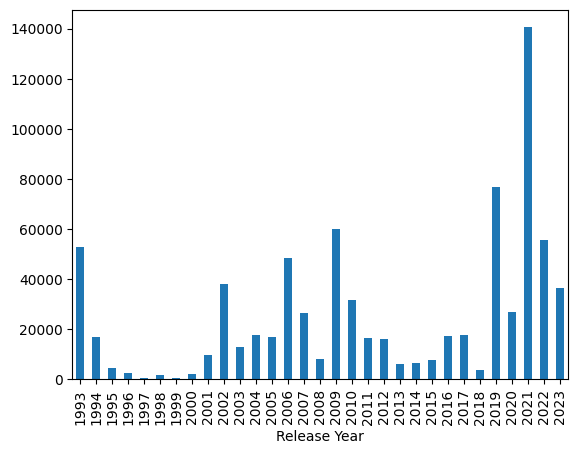

In [14]:
# Very limited Graph as a proof of concept
modern_card_counts_df.groupby('Release Year')['Total Count'].sum().plot(kind = 'bar')

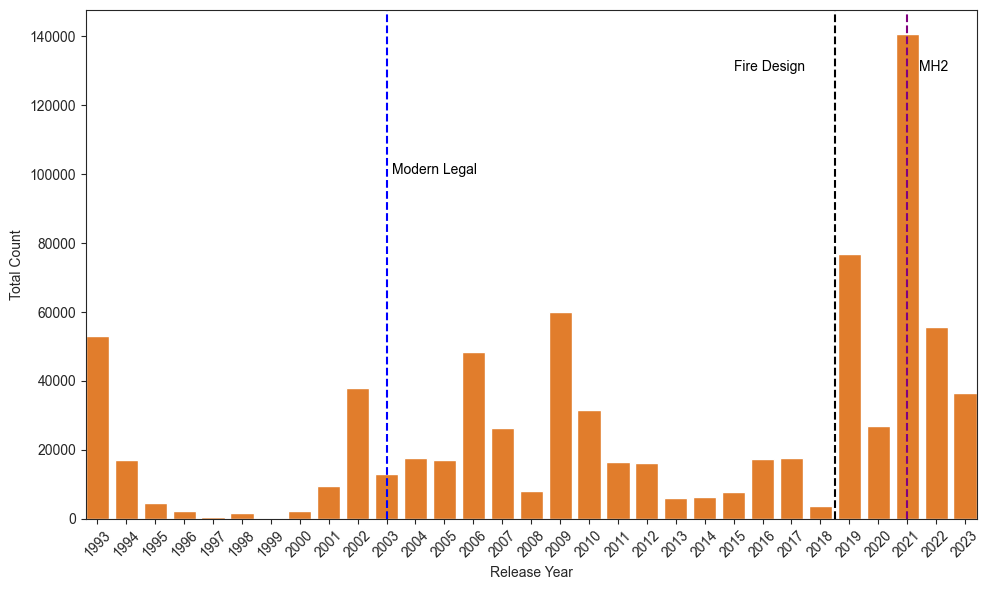

In [32]:
plt = ptd.create_base_graph(modern_card_counts_df,(255/255,122/255,14/255))
plt.axvline(x=10.0, color='blue', linestyle='--')
plt.text(10.2, 100000, 'Modern Legal', color = 'black', fontsize = 10)
plt.axvline(x=25.5, color='black', linestyle='--')
plt.text(22, 130000, 'Fire Design', color = 'black', fontsize = 10)
plt.axvline(x=28, color='purple', linestyle='--')
plt.text(28.4, 130000, 'MH2', color = 'black', fontsize = 10)
plt.margins(x=0)

### Pioneer Data

In [16]:
base_path: str = os.path.join(DATA_DIRECTORY, '2023')
pioneer_card_counts_df: pd.DataFrame = ltd.load_format_card_counts(base_path, 'pioneer')
pioneer_card_counts_df

,Card Name,Total Count
0,Wolfwillow Haven,2966
1,"Karn, the Great Creator",3116
2,"Boseiju, Who Endures",4239
3,Forest,10027
4,Lair of the Hydra,2354
...,...,...
1637,Temple of Triumph,1
1638,Quakebringer,4
1639,Virulent Plague,1
1640,"Trelasarra, Moon Dancer",1


In [17]:
pioneer_card_counts_df = add_back_face(pioneer_card_counts_df)
pioneer_card_counts_df 

,Card Name,Total Count
0,Wolfwillow Haven,2966
1,"Karn, the Great Creator",3116
2,"Boseiju, Who Endures",4239
3,Forest,10027
4,Lair of the Hydra,2354
...,...,...
1637,Temple of Triumph,1
1638,Quakebringer,4
1639,Virulent Plague,1
1640,"Trelasarra, Moon Dancer",1


In [18]:
for name in pioneer_card_counts_df['Card Name']:
    if "Fable" in name:
        print(name)

Fable of the Mirror-Breaker // Reflection of Kiki-Jiki
Fabled Passage


In [19]:
pioneer_card_counts_df = pioneer_card_counts_df.merge(cards_set_df, on = 'Card Name', how = 'left')
pioneer_card_counts_df

,Card Name,Total Count,Set Name
0,Wolfwillow Haven,2966,THB
1,"Karn, the Great Creator",3116,WAR
2,"Boseiju, Who Endures",4239,NEO
3,Forest,10027,LEA
4,Lair of the Hydra,2354,AFR
...,...,...,...
1637,Temple of Triumph,1,THS
1638,Quakebringer,4,KHM
1639,Virulent Plague,1,DTK
1640,"Trelasarra, Moon Dancer",1,AFR


In [20]:
pioneer_card_counts_df = pioneer_card_counts_df.merge(set_year_df, on = 'Set Name', how = 'left', copy = True)
pioneer_card_counts_df

,Card Name,Total Count,Set Name,Release Year
0,Wolfwillow Haven,2966,THB,2020
1,"Karn, the Great Creator",3116,WAR,2019
2,"Boseiju, Who Endures",4239,NEO,2022
3,Forest,10027,LEA,1993
4,Lair of the Hydra,2354,AFR,2021
...,...,...,...,...
1637,Temple of Triumph,1,THS,2013
1638,Quakebringer,4,KHM,2021
1639,Virulent Plague,1,DTK,2015
1640,"Trelasarra, Moon Dancer",1,AFR,2021


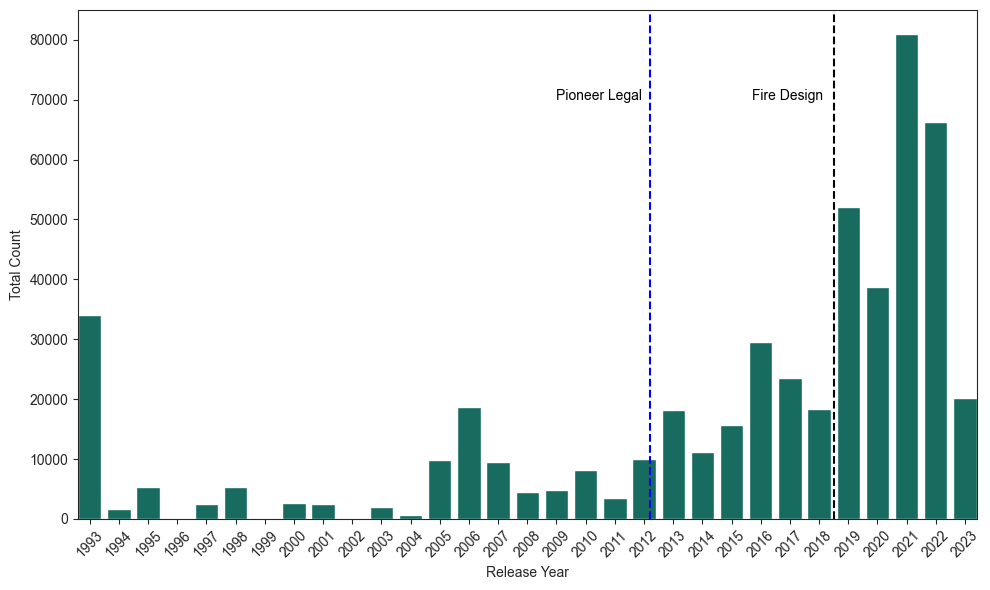

In [33]:
plt = ptd.create_base_graph(pioneer_card_counts_df, (9/255, 121/255, 105/255))
plt.axvline(x=19.2, color='blue', linestyle='--')
plt.text(16, 70000, 'Pioneer Legal', color = 'black', fontsize = 10)
plt.axvline(x=25.5, color='black', linestyle='--')
plt.text(22.7, 70000, 'Fire Design', color = 'black', fontsize = 10)
plt.show()

## Legacy

In [22]:
base_path: str = os.path.join(DATA_DIRECTORY, '2023')
legacy_card_counts_df: pd.DataFrame = ltd.load_format_card_counts(base_path, 'legacy')
legacy_card_counts_df

,Card Name,Total Count
0,Fable of the Mirror-Breaker,1758
1,Red Elemental Blast,1125
2,Lightning Bolt,3404
3,"Sokenzan, Crucible of Defiance",179
4,Grindstone,429
...,...,...
1340,Surge of Salvation,2
1341,Legions to Ashes,1
1342,Summoning Trap,2
1343,Hazoret the Fervent,1


In [23]:
legacy_card_counts_df = add_back_face(legacy_card_counts_df)
legacy_card_counts_df

,Card Name,Total Count
0,Fable of the Mirror-Breaker // Reflection of K...,1758
1,Red Elemental Blast,1125
2,Lightning Bolt,3404
3,"Sokenzan, Crucible of Defiance",179
4,Grindstone,429
...,...,...
1340,Surge of Salvation,2
1341,Legions to Ashes,1
1342,Summoning Trap,2
1343,Hazoret the Fervent,1


In [24]:
for name in legacy_card_counts_df['Card Name']:
    if "Fable" in name:
        print(name)

Fable of the Mirror-Breaker // Reflection of Kiki-Jiki


In [25]:
legacy_card_counts_df = legacy_card_counts_df.merge(cards_set_df, on = 'Card Name', how = 'left')
legacy_card_counts_df

,Card Name,Total Count,Set Name
0,Fable of the Mirror-Breaker // Reflection of K...,1758,NEO
1,Red Elemental Blast,1125,LEA
2,Lightning Bolt,3404,LEA
3,"Sokenzan, Crucible of Defiance",179,NEO
4,Grindstone,429,TMP
...,...,...,...
1340,Surge of Salvation,2,MOM
1341,Legions to Ashes,1,BRO
1342,Summoning Trap,2,ZEN
1343,Hazoret the Fervent,1,AKH


In [26]:
legacy_card_counts_df = legacy_card_counts_df.merge(set_year_df, on = 'Set Name', how = 'left', copy = True)
legacy_card_counts_df

,Card Name,Total Count,Set Name,Release Year
0,Fable of the Mirror-Breaker // Reflection of K...,1758,NEO,2022
1,Red Elemental Blast,1125,LEA,1993
2,Lightning Bolt,3404,LEA,1993
3,"Sokenzan, Crucible of Defiance",179,NEO,2022
4,Grindstone,429,TMP,1997
...,...,...,...,...
1340,Surge of Salvation,2,MOM,2023
1341,Legions to Ashes,1,BRO,2022
1342,Summoning Trap,2,ZEN,2009
1343,Hazoret the Fervent,1,AKH,2017


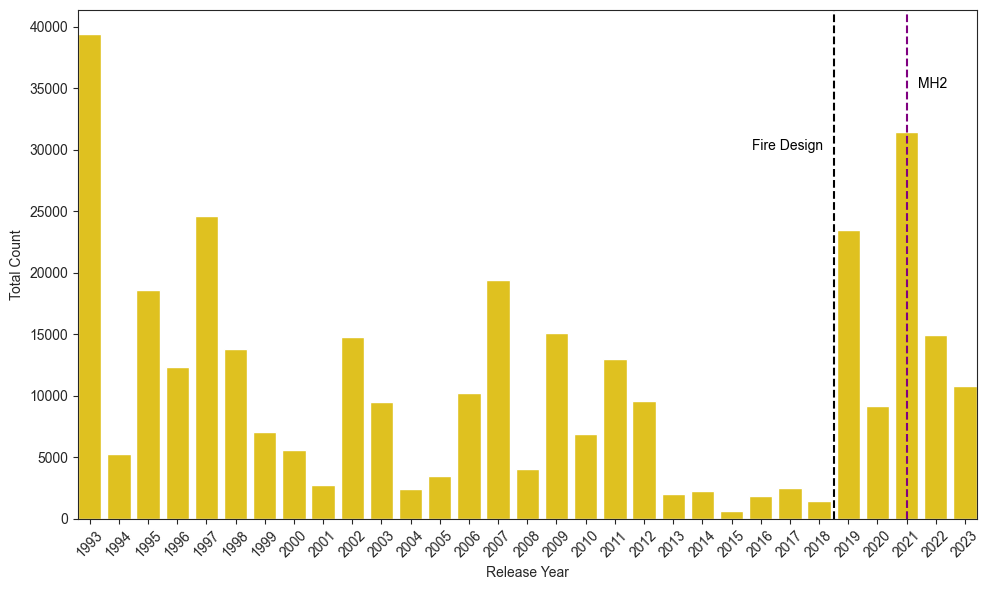

In [34]:
plt = ptd.create_base_graph(legacy_card_counts_df, (255/255, 215/255, 0/255))
plt.axvline(x=25.5, color='black', linestyle='--')
plt.text(22.7, 30000, 'Fire Design', color = 'black', fontsize = 10)
plt.axvline(x=28, color='purple', linestyle='--')
plt.text(28.4, 35000, 'MH2', color = 'black', fontsize = 10)
plt.show()
